## Observations and Insights 



In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Checking the number of mice
num_mice = merged_df["Mouse ID"].nunique()

#Print the results 
num_mice

249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_g989 = merged_df.loc[merged_df["Mouse ID"] == "g989"]

mouse_g989.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mice_df = merged_df[merged_df['Mouse ID'].isin(duplicate)==False]

cleaned_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_df["Mouse ID"].nunique()

248

## Summary Statistics

### Part 1
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

This method is the most straighforward, creating multiple series and putting them all together at the end.

### Part 2
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

This method produces everything in a single groupby function

In [55]:
#PART 1

#Use ".groupby()" to group the cleaned dataframe by the different drug regimens 
grouped_regimen = cleaned_mice_df.groupby("Drug Regimen")

#Use the appropriate functions to calculate the required values for each regimens 
regimens_means = grouped_regimen["Tumor Volume (mm3)"].mean()
regimens_medians = grouped_regimen["Tumor Volume (mm3)"].median()
regimens_variances = grouped_regimen["Tumor Volume (mm3)"].var()
regimens_standev = grouped_regimen["Tumor Volume (mm3)"].std()
regimens_sems = grouped_regimen["Tumor Volume (mm3)"].sem()

#Create a dataframe with the information accquired 
summary_stats_df = pd.DataFrame({
    "Mean Tumor Vol": regimens_means,
    "Median Tumor Vol": regimens_medians,
    "Tumor Vol. Variance": regimens_variances,
    "Tumor Vol. Standard Deviation": regimens_standev,
    "Tumor Vol. SEM": regimens_sems
})

#Display the dataframe 
summary_stats_df

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol. Variance,Tumor Vol. Standard Deviation,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
#PART 2 

#Use the ".agg()" (aggrigate) function to run the required functions on the "Tumor Volume (mm3)" column of the grouped dataframe
summary_stats_df2 = cleaned_mice_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

#Display the dataframe create above
summary_stats_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

### Part 1
Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


### Part 2
Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

### Part 3
Generate a pie plot showing the distribution of female versus male mice using pandas

### Part 4
Generate a pie plot showing the distribution of female versus male mice using pyplot

[Text(0, 0.5, 'Number of Appearences'), Text(0.5, 0, 'Drug Regimen')]

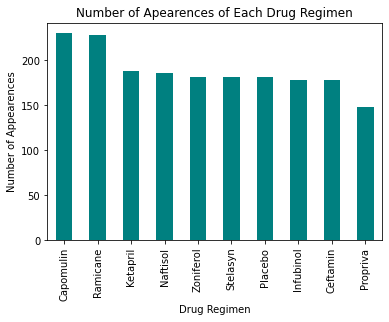

In [57]:
#PART 1

#Gather the data required
pandas_plot1 = cleaned_mice_df['Drug Regimen'].value_counts()

#Pandas uses ".plot()" to create plots from a dataframe. This will build the husk of the plot and ".set()" will create the axis labels 
pandas_plot1.plot(kind="bar", color="teal", title="Number of Apearences of Each Drug Regimen").set(xlabel= "Drug Regimen", ylabel="Number of Appearences")

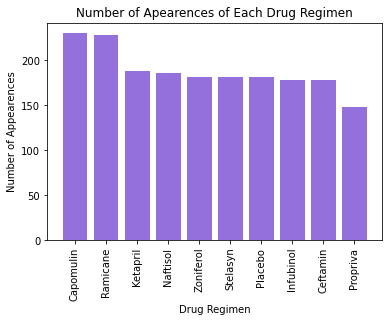

In [58]:
#PART 2

#Gather the infromation required 
pyplot_plot1 = cleaned_mice_df["Drug Regimen"].value_counts()

#Pyplot will use "plt.___" (in the instance of this workbook) to create, edit and display plots
plt.bar(pyplot_plot1.index.values,pyplot_plot1.values, color="mediumpurple")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Appearences")
plt.xticks(rotation=90)
plt.title("Number of Apearences of Each Drug Regimen")
plt.show()

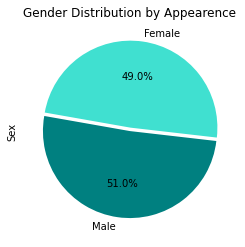

In [59]:
#PART 3 

#Gather the data required
gender_df = cleaned_mice_df["Sex"].value_counts()

#Pandas uses ".plot()" to create plots from a dataframe
pandas_plot2 = gender_df.plot(kind="pie",startangle=170, explode=(0,0.04), colors=("teal","turquoise"),autopct='%1.1f%%', title='Gender Distribution by Appearence')

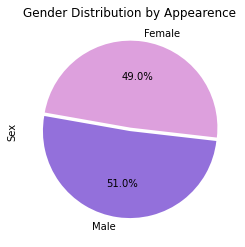

In [60]:
#PART 4

#Gather the data required
gender_df = cleaned_mice_df["Sex"].value_counts()
sex = gender_df.keys()

#Pyplot will use "plt.___" (in the instance of this workbook) to create, edit and display plotst.___" (in the instance of this workbook) to create, edit and display plots
plt.pie(gender_df, labels=sex, explode=(0,0.04), startangle=170, colors=("mediumpurple","plum"), autopct="%1.1f%%")
plt.title("Gender Distribution by Appearence")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

### Part 1 
Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane Infubinol, and Ceftamin
* Start by getting the last (greatest) timepoint for each mouse
* Merge this group df with the original dataframe to get the tumor volume at the last timepoint

### Part 2
1. Put treatments into a list for for loop (and later for plot labels)

2. Create empty list to fill with tumor vol data (for plotting)

3. Calculate the IQR and quantitatively determine if there are any potential outliers. 

    * Locate the rows which contain mice on each drug and get the tumor volumes    
    * add subset 
    * Determine outliers using upper and lower bounds

### Part 3 
Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [61]:
# PART 1    

#Group the data by mouse ID and extract datapoints containg the largest timepoint for each mouse 
largest_timepoint = cleaned_mice_df.groupby(['Mouse ID'])["Timepoint"].max()

#Reset the index on this new dataframe to make it easier to merge
largest_timepoint = largest_timepoint.reset_index()

#Merge the above with the cleaned dataframe into a new dataframe 
merged_df2 = pd.merge(cleaned_mice_df, largest_timepoint, on = ["Mouse ID", "Timepoint"], how= "left")

#Display the dataframe
merged_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
#PART 2 

#Create a list for the required regimens
regimens = ['Capomulin', "Ramicane", "Infubinol", "Ceftamin"]

#Create an empty list to store the tumor volumes 
tumor_vol = []

#start the for loop to extract the relevant information
for drug in regimens: 

    t_volume = merged_df2.loc[merged_df2['Drug Regimen']== drug, 'Tumor Volume (mm3)']
    
    tumor_vol.append(t_volume)

    quartiles = t_volume.quantile([0.25,0.5,0.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    iqr = upper_quart-lower_quart
    lower_boundary = lower_quart - (1.5*iqr)
    upper_boundary = upper_quart + (1.5*iqr)
    outliers = t_volume.loc[(t_volume < lower_boundary) | (t_volume > upper_boundary)].count()

    #Apply formatting to the IQR so that it is easier to read
    iqr = "{:.2f}".format(iqr)
    print(f"    {drug}'s IQR is {iqr}. The number of potential outliers for this drug are {outliers}.")

    Capomulin's IQR is 7.31. The number of potential outliers for this drug are 2.
    Ramicane's IQR is 8.33. The number of potential outliers for this drug are 1.
    Infubinol's IQR is 10.00. The number of potential outliers for this drug are 0.
    Ceftamin's IQR is 9.59. The number of potential outliers for this drug are 0.


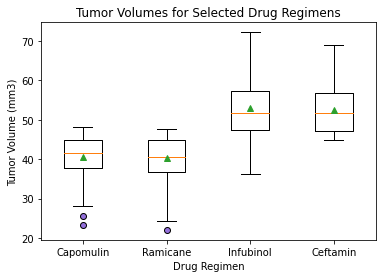

In [94]:
#PART 3

#Create a box plot using 'plt.boxplot'. Outliers are highlighted with the "mediumpurple" colour 
outliers_colour = dict(markerfacecolor='mediumpurple')
plt.boxplot(tumor_vol, labels=regimens, flierprops=outliers_colour, showmeans=True)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Tumor Volumes for Selected Drug Regimens")
plt.show()

## Line and Scatter Plots

### Part 1

Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

### Part 2
Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

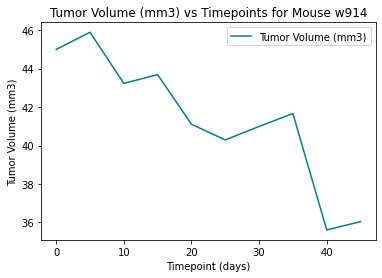

In [124]:
#PART 1

#Create a dataframe for only those mice treated with Capomulin
capomulin_df = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"]=="Capomulin"]

#Use ".sample()" to select a random mouse that has been treated with Capomulin
random = capomulin_df['Mouse ID'].sample()
# print(random)

#Extract the information for this mouse into a new dataframe
mouse_w914_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "w914"]

#Create the line plot for this mouse, meeting the requirements of the plot
mouse_w914_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', color="teal")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs Timepoints for Mouse w914")
plt.show()

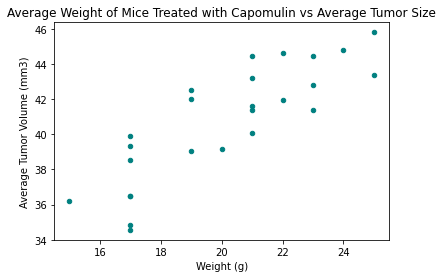

In [125]:
#PART 2 

#Group "capomulin_df" by the mouse ID and run the ".mean()" function on cells of the dataframe to allow for a groupby to occur
capomulin_df_pt2 = capomulin_df.groupby(['Mouse ID']).mean()

#Create a scatterplot to meet the requirements for this part 
capomulin_df_pt2.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)", color="teal")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Weight of Mice Treated with Capomulin vs Average Tumor Size")
plt.show()

## Correlation and Regression

Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [144]:
#CORRELATION CO-EFFICIENT

#Scipy.stats is able to assist within finding the correlation coeffecient by the use of the "pearsonr()" function on the appropriate columns of the dataframe 
pearson_corr = round(st.pearsonr(capomulin_df_pt2['Weight (g)'], capomulin_df_pt2['Tumor Volume (mm3)'])[0],2)

#Print the results 
print("------------------------------------")
print(f'Correlation co-efficient = {pearson_corr}')

#Not required, but this "if" statement explains what the correlation value means to the reader
print("------------------------------------")
if pearson_corr <= 0.3:
    print("There is little to no correlation between tumor volume and weight of the mice")
elif pearson_corr <= 0.5:
    print("There is a weak correlation between tumor volume and weight of the mice")
elif pearson_corr <= 0.7:
    print("There is a moderate correlation between tumor volume and weight of the mice")
else:
    print("There is a strong correlation between tumor volume and weight of the mice") 

print("------------------------------------")

------------------------------------
Correlation co-efficient = 0.84
------------------------------------
There is a strong correlation between tumor volume and weight of the mice
------------------------------------


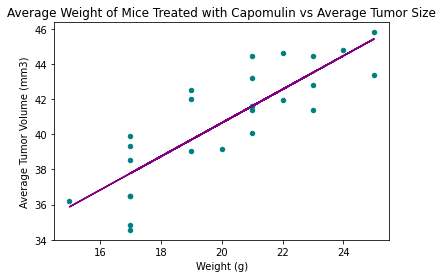

In [145]:
#LINE OF REGRESSION

#Use the Scipy.stats function of ".linregress()" to collect the information required for the line of regression
values = st.linregress(capomulin_df_pt2['Weight (g)'], capomulin_df_pt2['Tumor Volume (mm3)'])

#Perform the calculation to get the y values for the line of regression
y_values = capomulin_df_pt2['Weight (g)']*values[0]+values[1]

#Plot the scatter plot as seen in the previous section with the addition of the line of regression
capomulin_df_pt2.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)", color="teal")

#The following will plot the line across the scatter plot
plt.plot(capomulin_df_pt2['Weight (g)'], y_values, color='purple')

#Add necessary labels and display the finalised plot
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Weight of Mice Treated with Capomulin vs Average Tumor Size")
plt.show()